In [1]:
# Case Study 1

In [2]:
# Task 1: Data Loading and Exploration - PES2UG23CS906

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_churn_data.csv')

print(df.info())
print(df.shape)
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str


Churn Rate: 22.72%


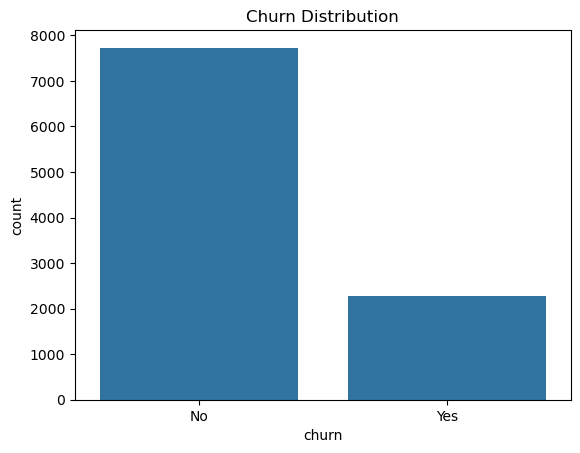

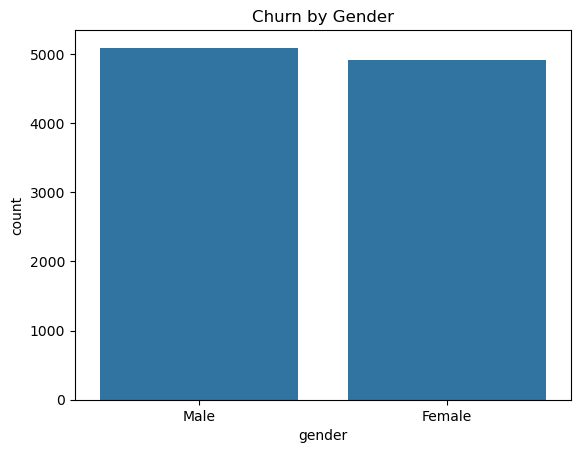

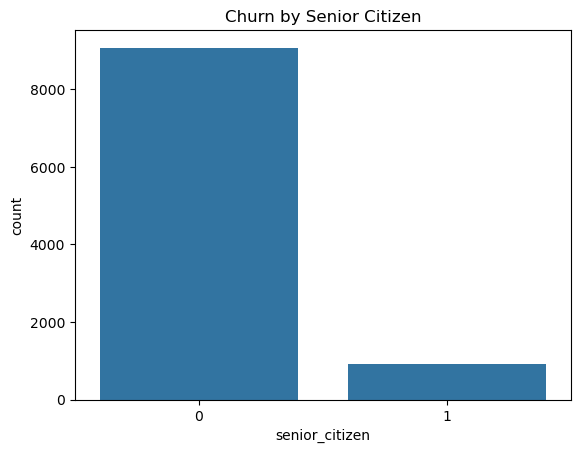

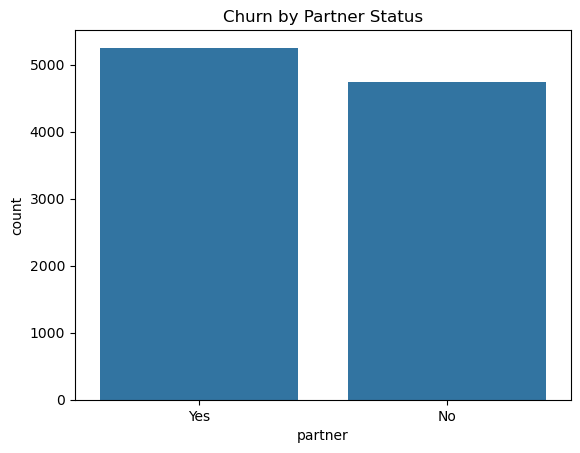

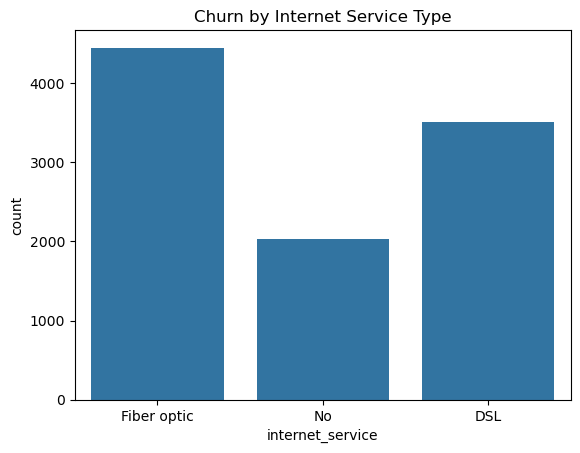

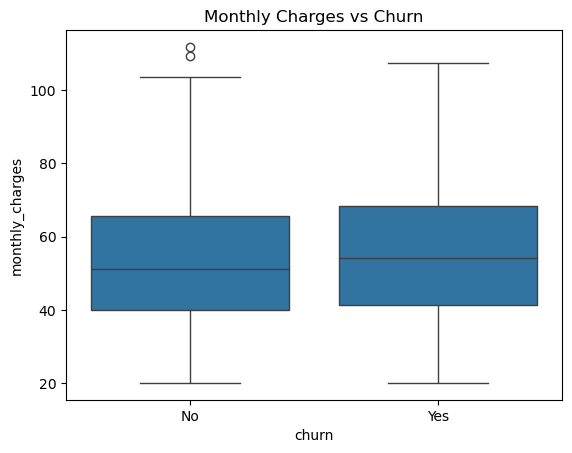

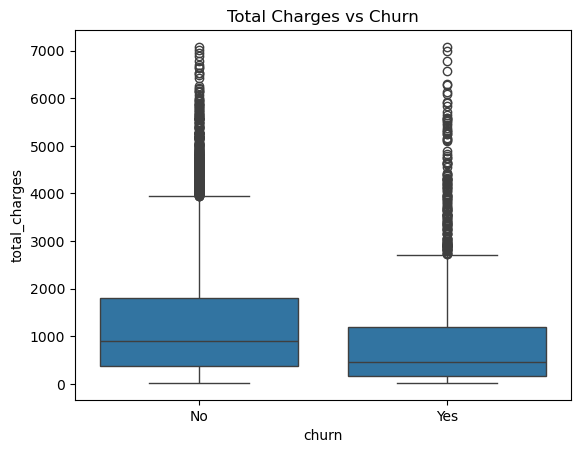

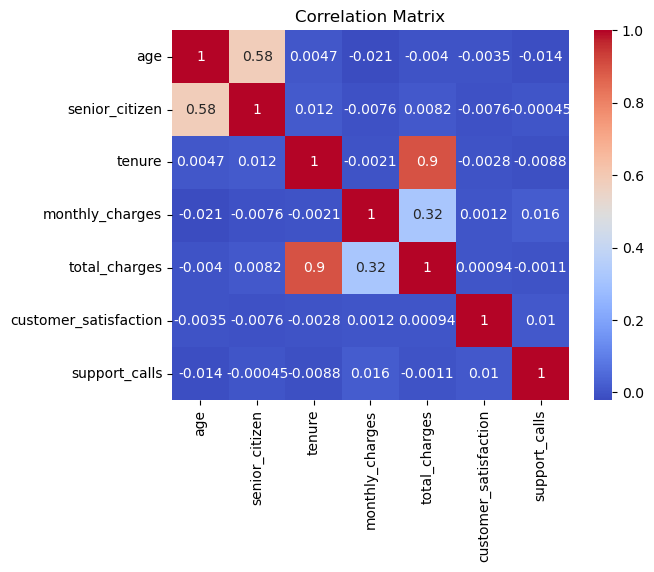

In [10]:
# Task 2: Exploratory Data Analysis (EDA) - PES2UG23CS906

# Churn distribution
churn_counts = df['churn'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum()
print(f"\nChurn Rate: {churn_rate:.2%}")
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

sns.countplot(data=df, x='gender')
plt.title('Churn by Gender')
plt.show()

sns.countplot(data=df, x='senior_citizen')
plt.title('Churn by Senior Citizen')
plt.show()

sns.countplot(data=df, x='partner')
plt.title('Churn by Partner Status')
plt.show()

sns.countplot(data=df, x='internet_service')
plt.title('Churn by Internet Service Type')
plt.show()

sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(data=df, x='churn', y='total_charges')
plt.title('Total Charges vs Churn')
plt.show()

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Task 3: Data Preprocessing - PES2UG23CS906

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

df['total_charges'].fillna(df['total_charges'].median(), inplace=True)

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'churn':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded['churn'] = df_encoded['churn'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
numerical = ['tenure', 'monthly_charges', 'total_charges']
df_encoded[numerical] = scaler.fit_transform(df_encoded[numerical])

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
# Task 4: Model Development

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=1, probability=True, class_weight='balanced')
svm.fit(X_train, y_train)


SVC(C=1, class_weight='balanced', probability=True)


Logistic Regression
Accuracy: 0.7895
Precision: 0.6222222222222222
Recall: 0.18502202643171806
F1 Score: 0.28522920203735147


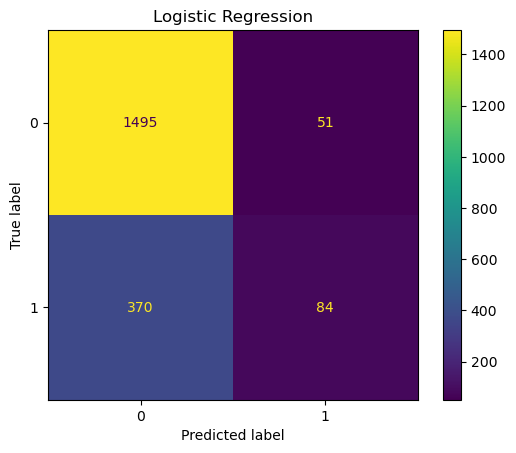


Decision Tree
Accuracy: 0.787
Precision: 0.5721649484536082
Recall: 0.2444933920704846
F1 Score: 0.3425925925925926


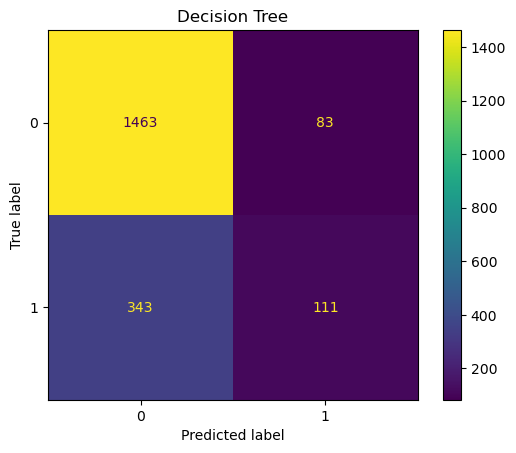


Random Forest
Accuracy: 0.787
Precision: 0.7333333333333333
Recall: 0.09691629955947137
F1 Score: 0.17120622568093385


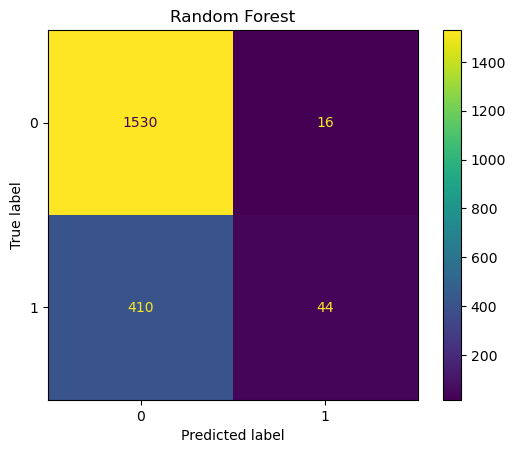


SVM
Accuracy: 0.451
Precision: 0.2261904761904762
Recall: 0.5859030837004405
F1 Score: 0.3263803680981595


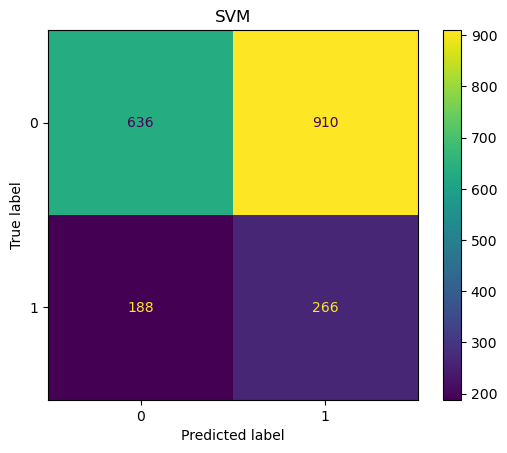

In [8]:
# Task 5: Model Evaluation - PES2UG23CS906

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf,
    'SVM': svm
}

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0)) 
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(name)
    plt.show()

for name, model in models.items():
    evaluate_model(name, model)
 


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression    0.7895   0.622222  0.185022  0.285229
1        Decision Tree    0.7870   0.572165  0.244493  0.342593
2        Random Forest    0.7870   0.733333  0.096916  0.171206
3                  SVM    0.4510   0.226190  0.585903  0.326380


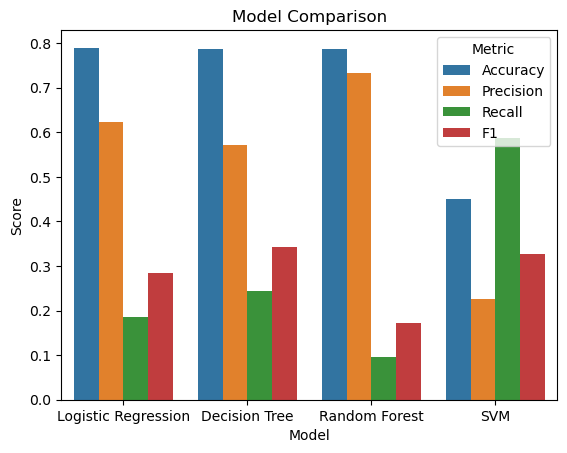

In [9]:
   
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append([name,
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    f1_score(y_test, y_pred)])
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1"])
print(results_df)
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),x="Model", y="Score", hue="Metric")
plt.title("Model Comparison")
plt.show()


In [7]:
# Select best model - PES2UG23CS906
best_model = rf  
final_preds = best_model.predict(X_test)
print("Final Model Evaluation")
print("Accuracy:", accuracy_score(y_test, final_preds))



Final Model Evaluation (Random Forest)
Accuracy: 0.787
